In [57]:
import torch
from torch import nn
from discriminator import Discriminator 
from generator import Generator
import pickle

import math
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [46]:
torch.manual_seed(111)

In [47]:
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)

In [48]:
train_set = torchvision.datasets.MNIST(
    root=".", train=True, download=True, transform=transform
)

In [49]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

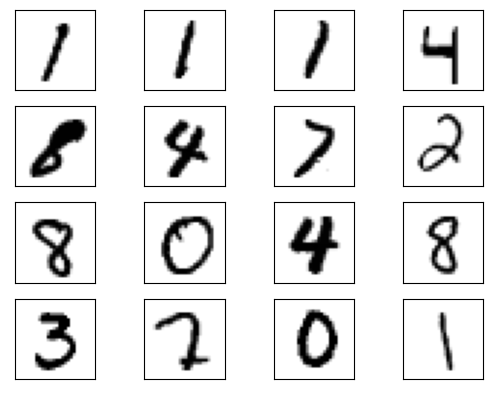

In [50]:
real_samples, mnist_labels = next(iter(train_loader))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(real_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

In [51]:
dsc = Discriminator()

In [52]:
gen = Generator()

In [53]:
lr = 0.0001
epochs = 50
loss_function = nn.BCELoss()
optimizer_discriminator = torch.optim.Adam(dsc.parameters(), lr=lr)
optimizer_gen = torch.optim.Adam(gen.parameters(), lr=lr)

In [54]:
for epoch in range(epochs):
    for n, (real_samples, mnist_labels) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples = real_samples
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 100))
        generated_samples = gen(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        dsc.zero_grad()
        output_dsc = dsc(all_samples)
        loss_dsc = loss_function(
            output_dsc, all_samples_labels
        )
        loss_dsc.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 100))

        # Training the generator
        gen.zero_grad()
        generated_samples = gen(latent_space_samples)
        output_dsc_generated = dsc(generated_samples)
        loss_gen = loss_function(
            output_dsc_generated, real_samples_labels
        )
        loss_gen.backward()
        optimizer_gen.step()

        # Show loss
        if n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_dsc}")
            print(f"Epoch: {epoch} Loss G.: {loss_gen}")

latent_space_samples = torch.randn(batch_size, 100).to(device=device)
generated_samples = gen(latent_space_samples)
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(generated_samples[i].reshape(28, 28), cmap="gray_r")
    plt.xticks([])
    plt.yticks([])

Epoch: 0 Loss D.: 0.5692477226257324
Epoch: 0 Loss G.: 0.4779079854488373
Epoch: 1 Loss D.: 0.01818668097257614
Epoch: 1 Loss G.: 8.540266990661621
Epoch: 2 Loss D.: 0.0794793963432312
Epoch: 2 Loss G.: 4.398355960845947
Epoch: 3 Loss D.: 0.0004852966230828315
Epoch: 3 Loss G.: 21.012224197387695
Epoch: 4 Loss D.: 0.04526004195213318
Epoch: 4 Loss G.: 7.836945533752441
Epoch: 5 Loss D.: 0.11256140470504761
Epoch: 5 Loss G.: 3.416555881500244
Epoch: 6 Loss D.: 0.14615276455879211
Epoch: 6 Loss G.: 4.052552223205566
Epoch: 7 Loss D.: 0.10683729499578476
Epoch: 7 Loss G.: 2.9305546283721924
Epoch: 8 Loss D.: 0.20931099355220795
Epoch: 8 Loss G.: 2.6979596614837646
Epoch: 9 Loss D.: 0.19847741723060608
Epoch: 9 Loss G.: 2.73026180267334
Epoch: 10 Loss D.: 0.3371163308620453
Epoch: 10 Loss G.: 2.3034310340881348
Epoch: 11 Loss D.: 0.3317078948020935
Epoch: 11 Loss G.: 1.7330988645553589
Epoch: 12 Loss D.: 0.371774286031723
Epoch: 12 Loss G.: 1.8421719074249268
Epoch: 13 Loss D.: 0.400207698

NameError: name 'device' is not defined

([], [])

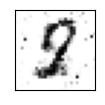

In [70]:
latent_space_samples = torch.randn(1, 100)
generated_samples = gen(latent_space_samples)
generated_samples = generated_samples.cpu().detach()
i = 0
#for i in range(16):
ax = plt.subplot(4, 4, i + 1)
plt.imshow(generated_samples[0].reshape(28, 28), cmap="gray_r")
plt.xticks([])
plt.yticks([])

In [61]:
filename = 'generator.pkl'
pickle.dump(gen.model, open(filename,'wb'))